In [12]:
# Importation des bibliothèque
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
#from sklearn import svm
from sklearn.decomposition import PCA

# feature selection RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature selection chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature selection from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings # current verimport matplotlib.pyplot as pltsion of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#===================================#



In [2]:
# Lecture de données
filename = "covtype.data"
inf=[""]*55
names=["Elevation","Aspect","Slope",
       "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
       "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
       "Horizontal_Distance_To_Fire_Points",'Wilderness_Area_1','Wilderness_Area_2',
       'Wilderness_Area_3','Wilderness_Area_4']
inf[0:len(names)]=names
print(len(names))       
sole_type=[]
    
for i in range(len(names),54):
    val = "Soil_Type_"+str(i-len(names)+1)
    inf[i]=val
    sole_type.append(val)
inf[54]="Cover_Type"


data = pd.read_csv(filename,names= inf)
data.head(2)



14


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5


In [3]:
CoverTypesClasses=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
print(CoverTypesClasses)

dictCover={}
invdictCover={}

for i,t in enumerate(CoverTypesClasses):
    dictCover[i+1]=t
    invdictCover[t]=i+1
y = data["Cover_Type"]
data_names=data.replace({"Cover_Type":dictCover})
data_names.head(2)
data_nn=data_names
data_nn["Cover_Type_num"]=y


['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']


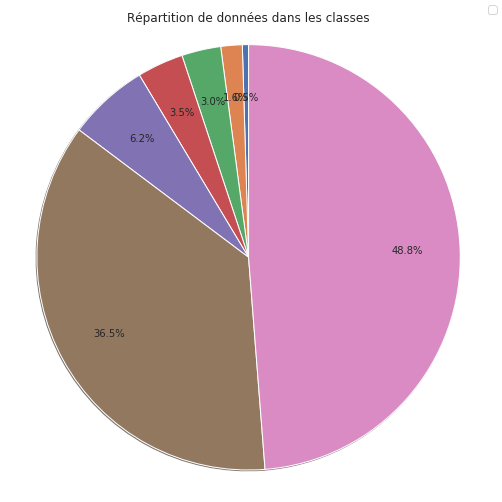

In [4]:
# Analyse de données
# Cambert de répartition de données

CoverTypesClasses.sort()

values =data["Cover_Type"].value_counts(ascending=True)
fig, ax = plt.subplots()
patches = ax.pie(values,rotatelabels=True, autopct='%1.1f%%',
        shadow=True, startangle=90,pctdistance=0.75,radius=5)
#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.set_size_inches(7, 7)
plt.title("Répartition de données dans les classes")
labels = ["a","b","c","d","e","f","g"]
fig.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
fig.savefig("proportion_de_donnée_dans_classe")
plt.show()



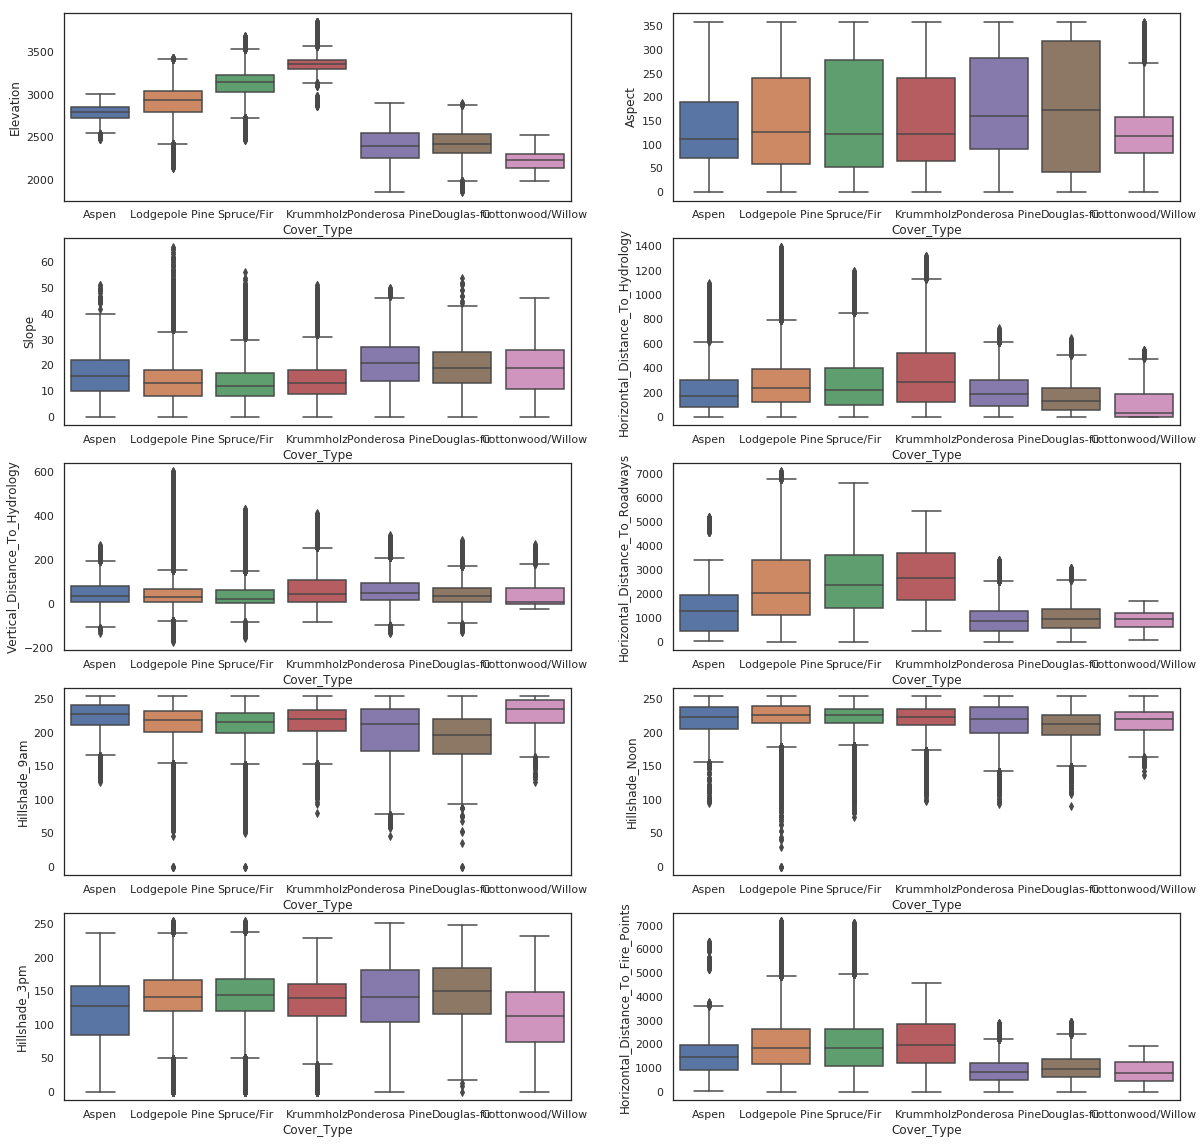

In [19]:
# BoxPlot variables quantitatives
f, ax = plt.subplots(5,2,figsize=(20,20))
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(x="Cover_Type", y=names[i*2+j], data=data_names, ax=ax[i,j])
        
plt.show()

In [4]:
#data_nn=data_names
#data_nn["Cover_Type_num"]=data["Cover_Type"]
data_nn.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Cover_Type_num
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,Aspen,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,Aspen,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,Lodgepole Pine,2


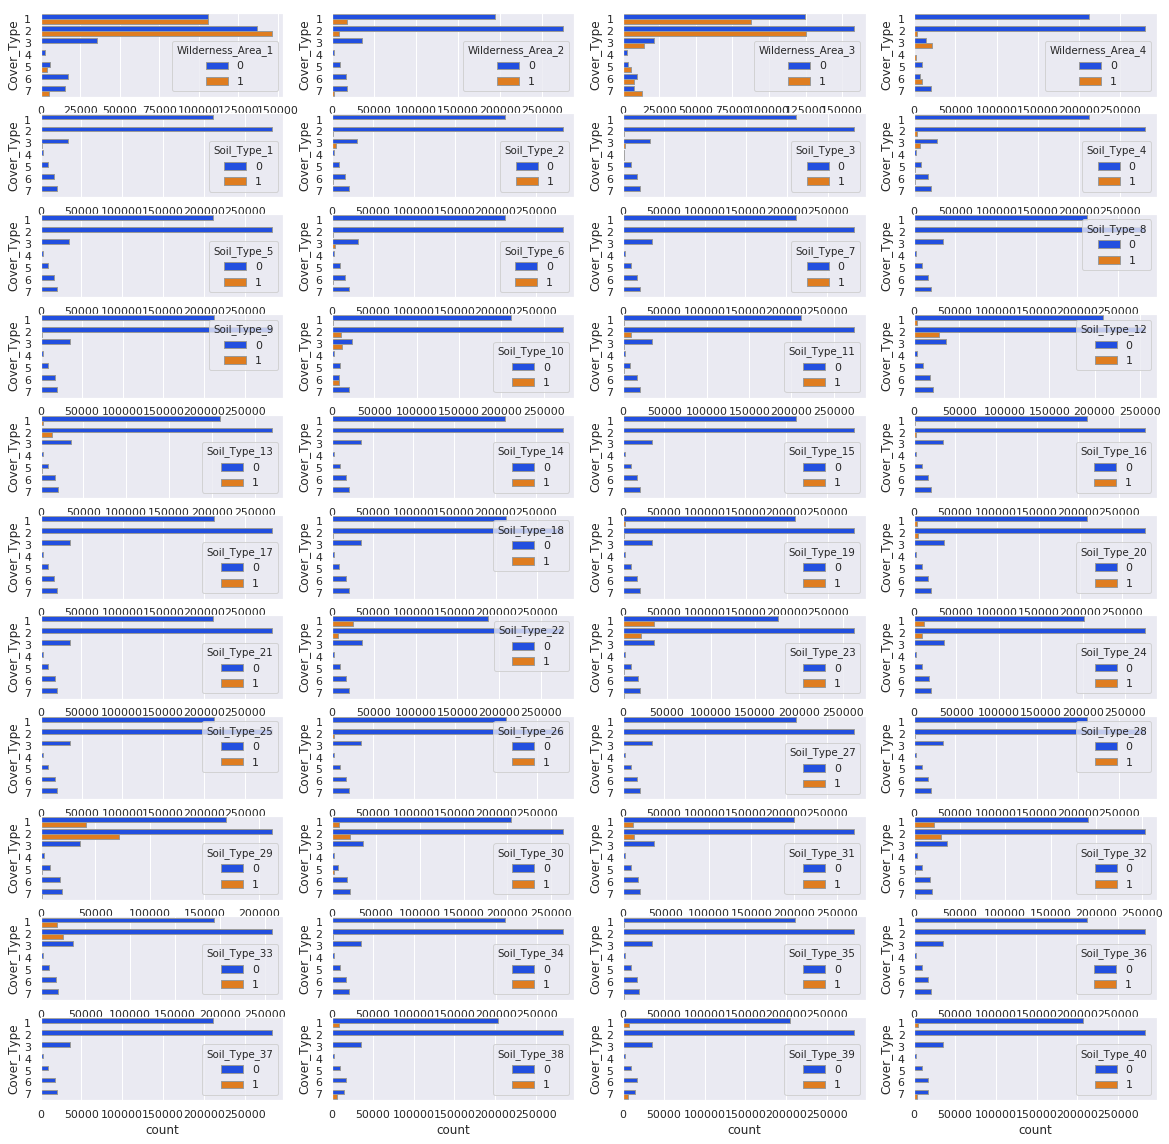

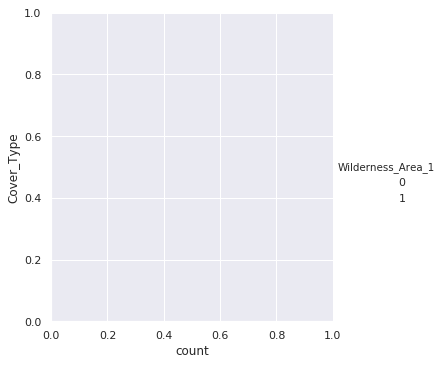

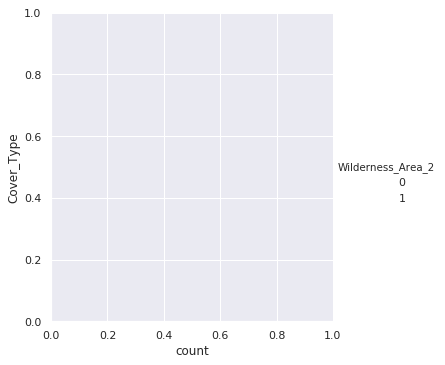

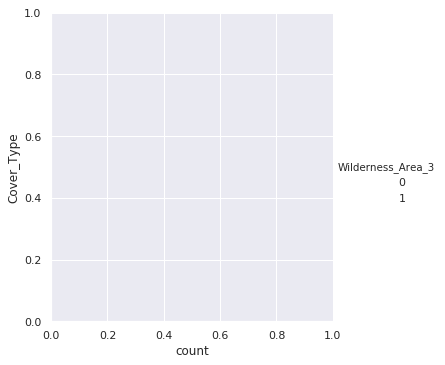

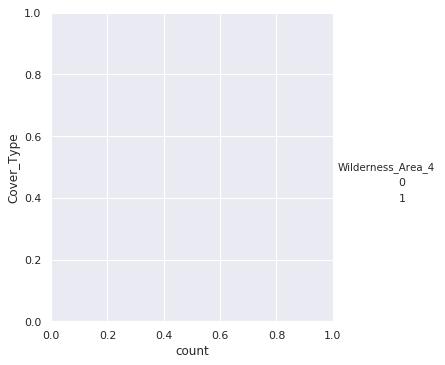

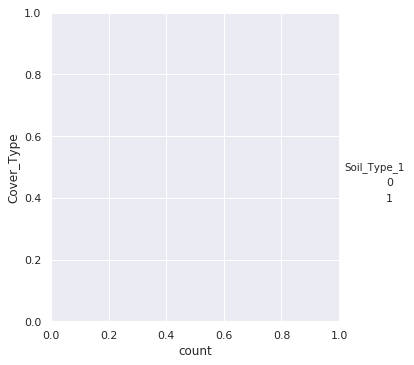

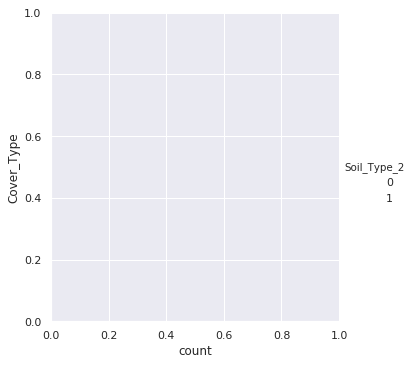

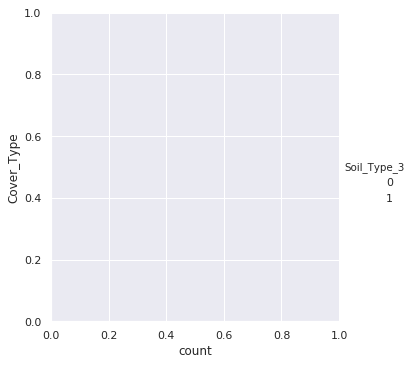

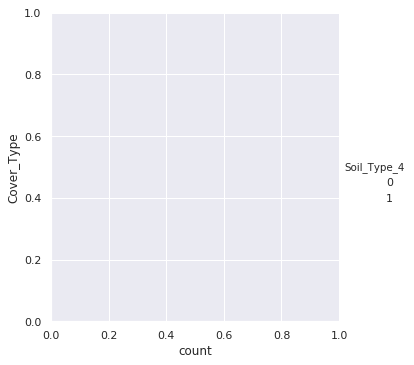

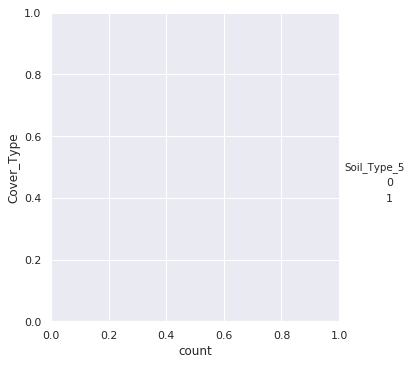

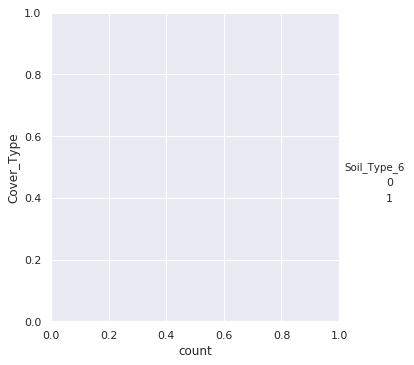

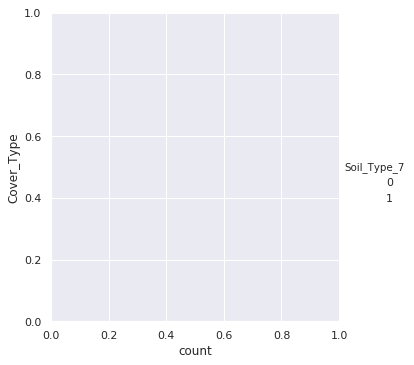

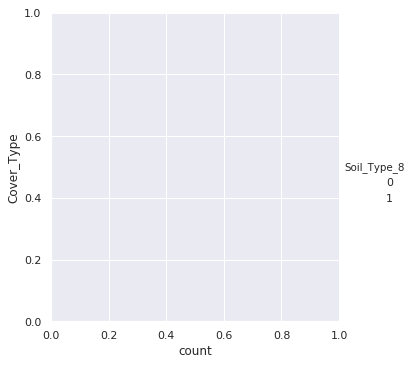

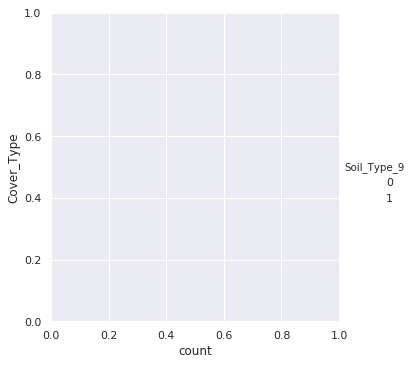

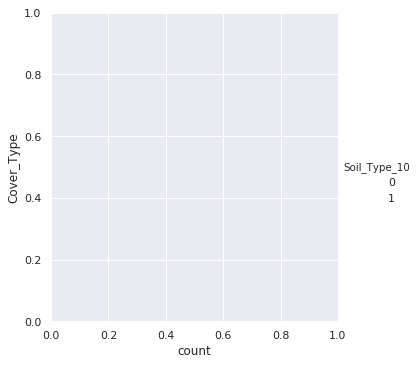

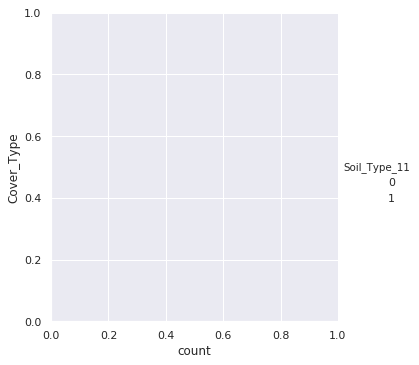

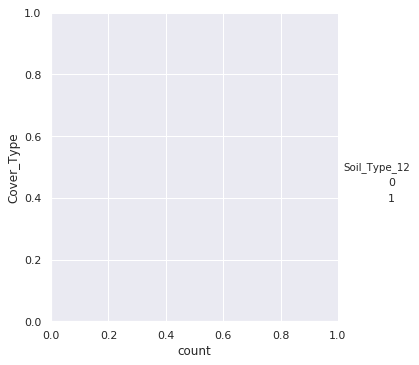

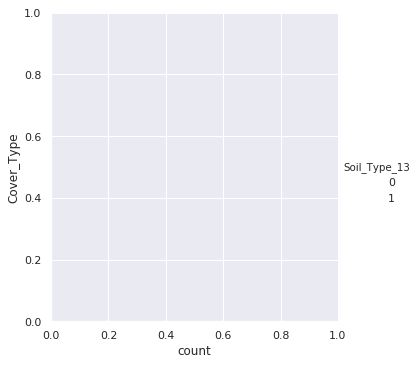

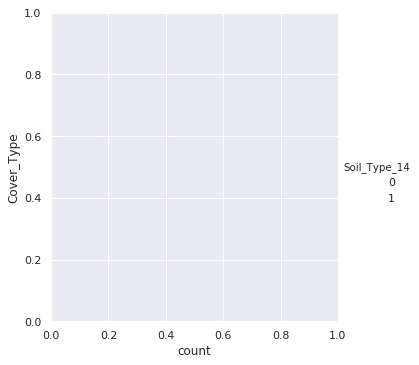

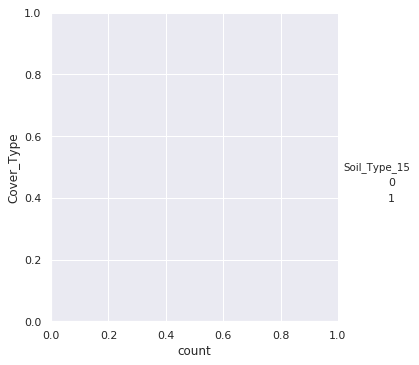

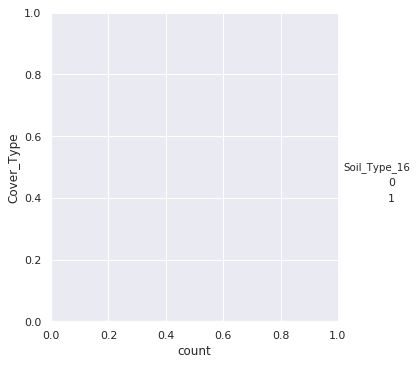

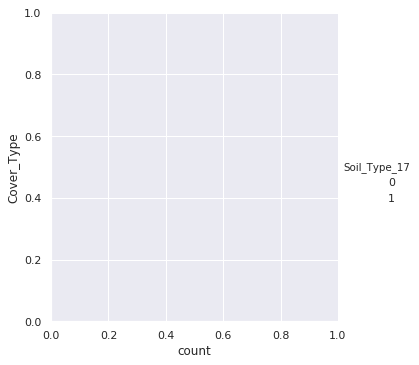

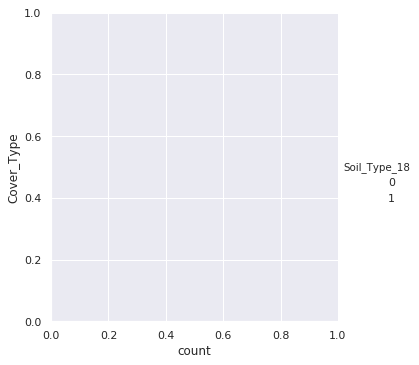

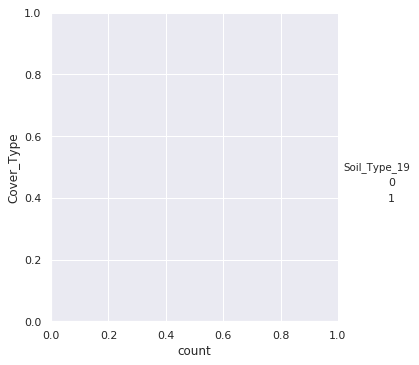

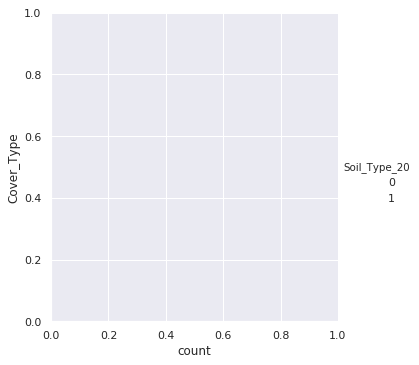

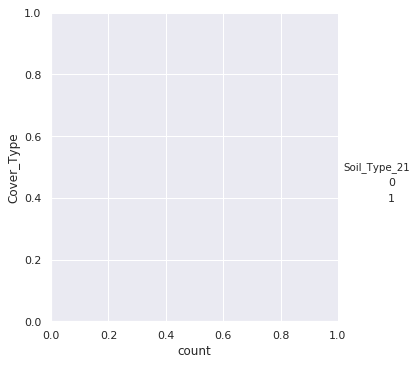

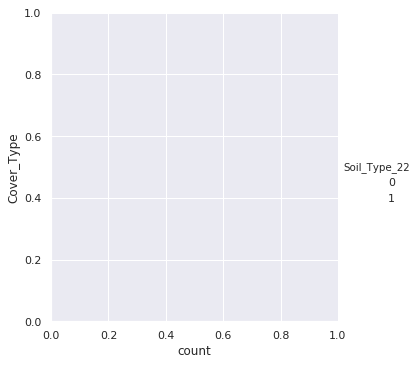

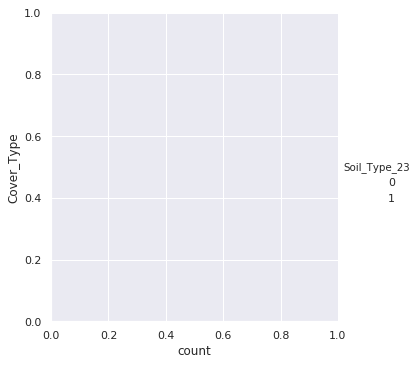

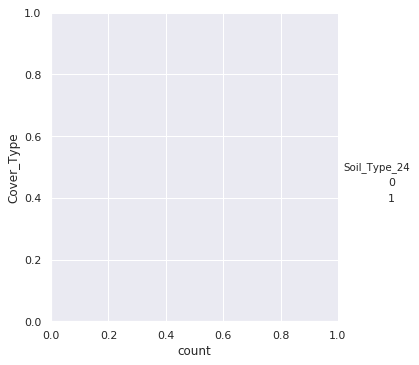

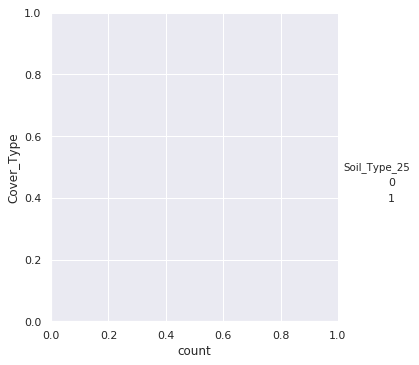

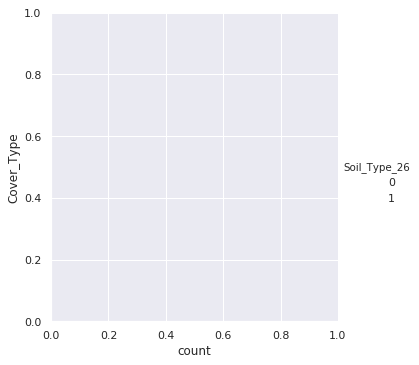

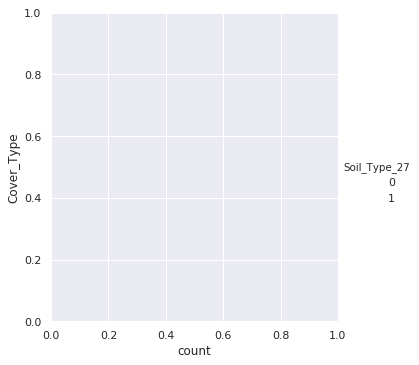

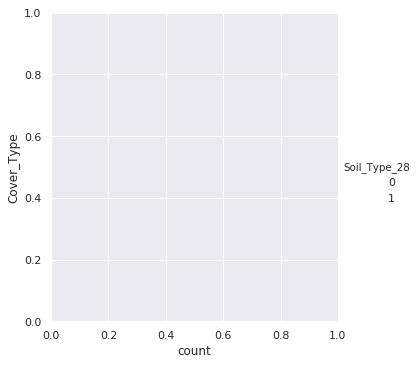

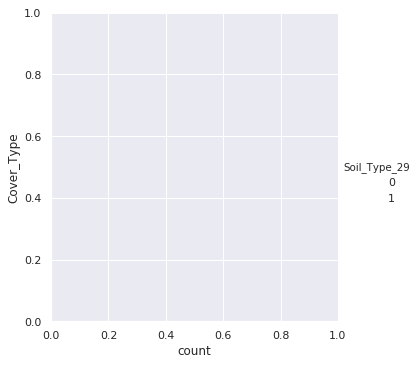

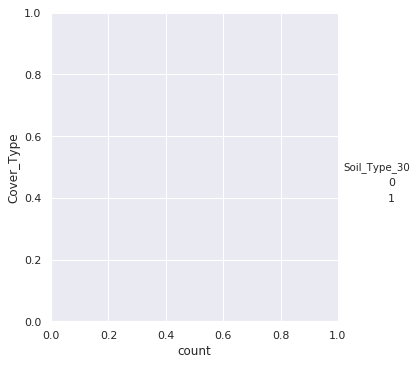

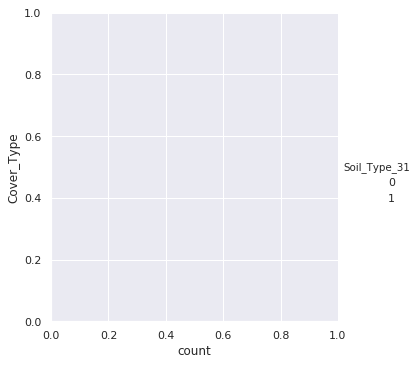

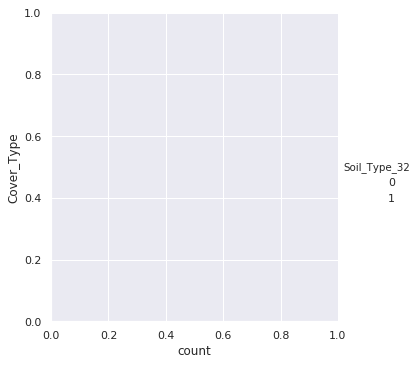

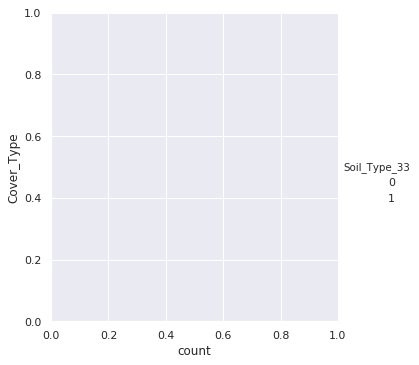

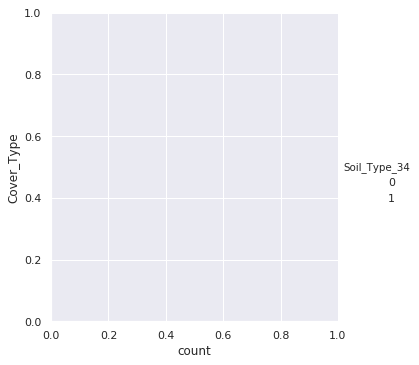

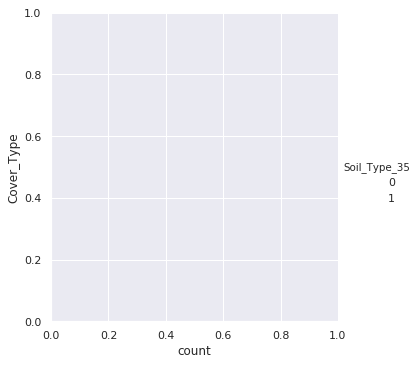

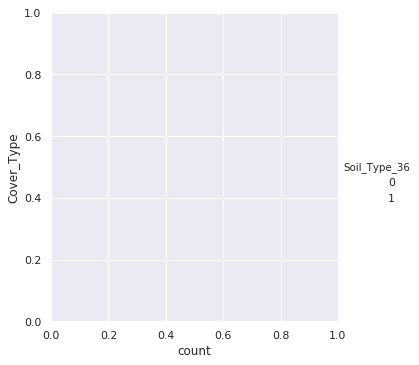

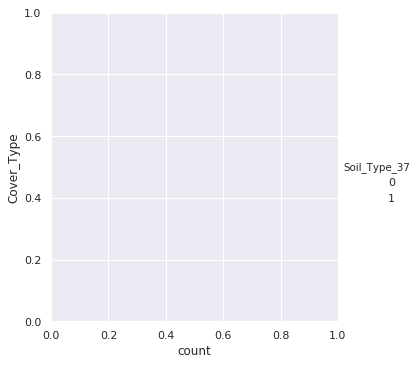

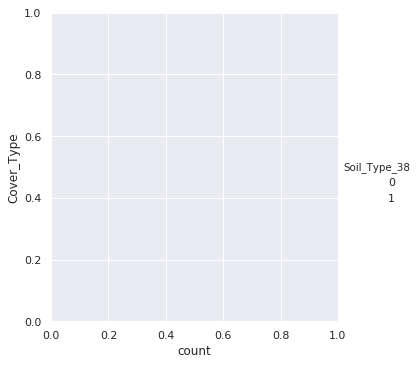

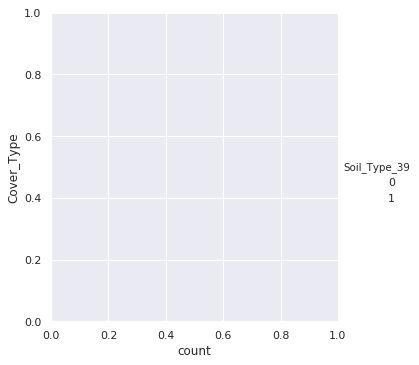

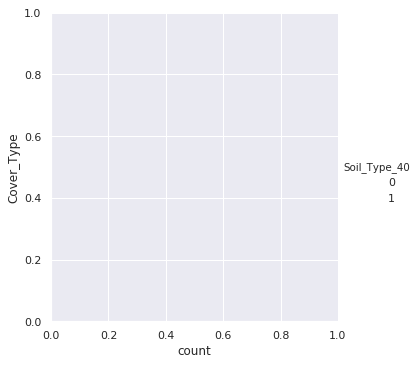

In [13]:
# Histograme wildness_area
categorical_names = inf[10:54]
# Variable qualitative

f, ax = plt.subplots(11,4,figsize=(20,20))
for i in range(0,11):
    for j in range(0,4):
        sns.catplot(y="Cover_Type", hue=categorical_names[i*4+j], kind="count",palette="bright", edgecolor=".6",ax=ax[i,j],data=data)
        
        
plt.show()


In [6]:
target1 = data.loc[data["Cover_Type"]==1].iloc[:,0:10]
target2 = data.loc[data["Cover_Type"]==2].iloc[:,0:10]
target3 = data.loc[data["Cover_Type"]==3].iloc[:,0:10]
target4 = data.loc[data["Cover_Type"]==4].iloc[:,0:10]
target5 = data.loc[data["Cover_Type"]==5].iloc[:,0:10]
target6 = data.loc[data["Cover_Type"]==6].iloc[:,0:10]
target7 = data.loc[data["Cover_Type"]==7].iloc[:,0:10]

targets = [target1,target2,target3,target4,target5,target6,target7]

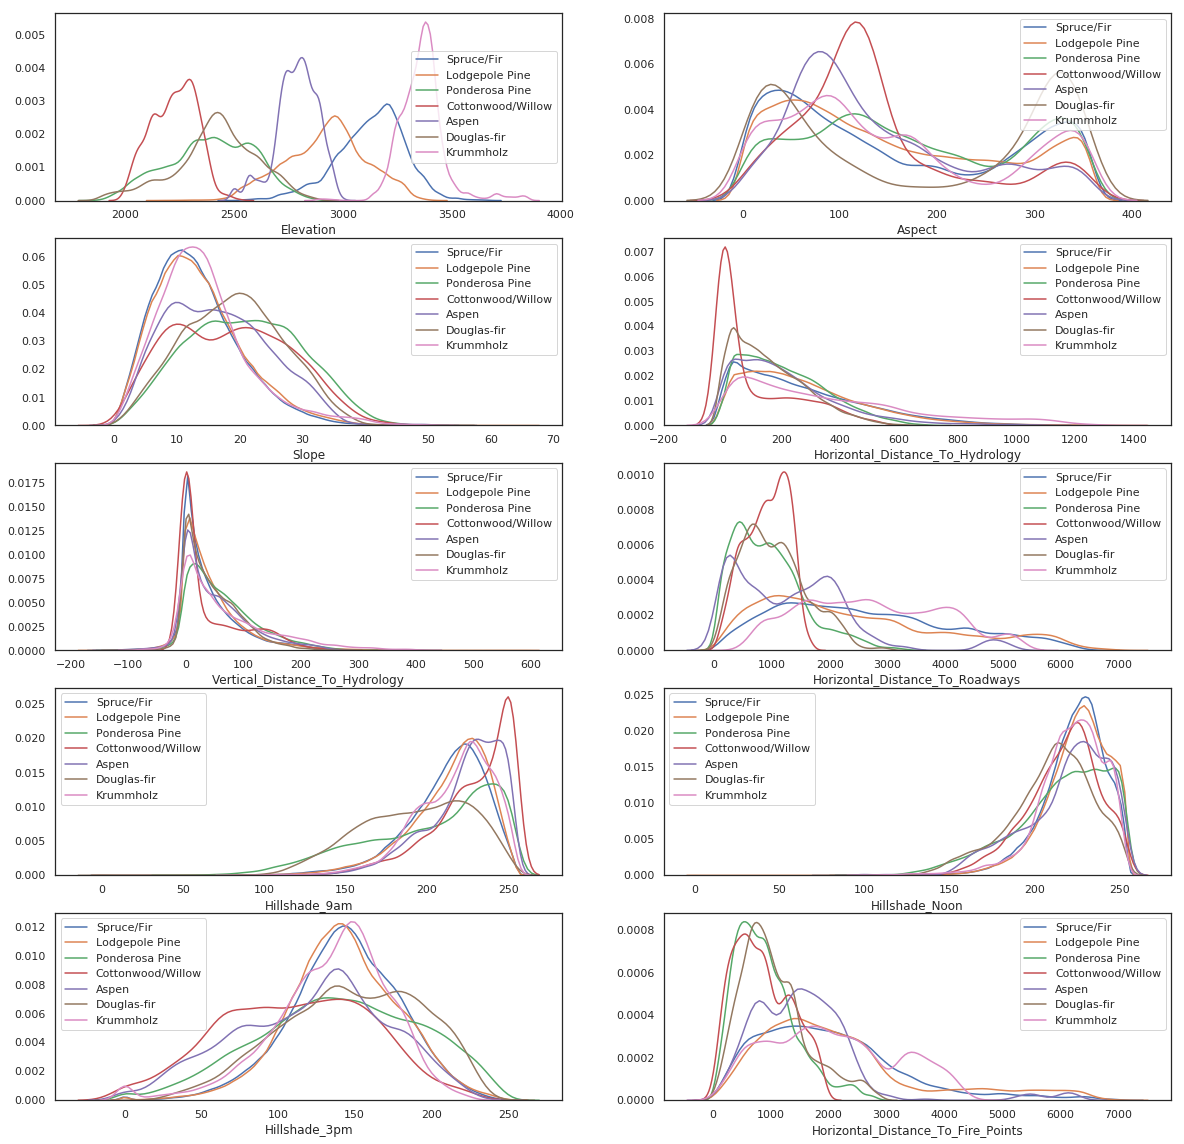

In [7]:
f, ax = plt.subplots(5,2,figsize=(20,20))

for i in range(0,5):
    for j in range(0,2):
        for k in range(0,7):
            sns.distplot(targets[k][inf[i*2+j]], hist=False,ax=ax[i,j],label = CoverTypesClasses[k])
            
plt.legend()
plt.show()


